# MSSW on airlines evaluation

## Accept and preprocess the airlines dataset

In [21]:
import csv

import numpy as np
import pandas as pd
import seaborn as sb

In [22]:
from eval_helpers import accepting
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


airlines_exclude_reference_batches = []
airlines_exclude_testing_batches = []
airlines_onehot_reference_batches = []
airlines_onehot_testing_batches = []
airlines_target_reference_batches = []
airlines_target_testing_batches = []


df = pd.read_csv("../Datasets_concept_drift/real_world_data/airline_dataset.csv")

X = df.drop(columns=['Unnamed: 0', 'Delay'])
y = df["Delay"]

print('number of unique airlines', df['Airline'].nunique())

X_ref = X[:179794]
X_test = X[179794:]
y_ref = y[:179794]
y_test = y[179794:]

df_x_ref_num, df_x_ref_cat = accepting.divide_numeric_categorical(X_ref)
df_x_test_num, df_x_test_cat = accepting.divide_numeric_categorical(X_test)

X_ref_exclude = df_x_ref_num.to_numpy()
X_test_exclude = df_x_test_num.to_numpy()

ref_index = df_x_ref_cat.index
test_index = df_x_test_cat.index
encoder = TargetEncoder()
encoder.fit(df_x_ref_cat, y_ref)
df_x_ref_cat_transformed = pd.DataFrame(encoder.transform(df_x_ref_cat))
df_x_test_cat_transformed = pd.DataFrame(encoder.transform(df_x_test_cat))
df_x_ref_cat_transformed.set_index(ref_index, inplace=True)
df_x_test_cat_transformed.set_index(test_index, inplace=True)
X_ref_target = df_x_ref_num.join(df_x_ref_cat_transformed, lsuffix='_num').to_numpy()
X_test_target = df_x_test_num.join(df_x_test_cat_transformed, lsuffix='_num').to_numpy()

ref_index = df_x_ref_cat.index
test_index = df_x_test_cat.index
encoder = OneHotEncoder(sparse=False)
encoder.fit(df_x_ref_cat)
df_x_ref_cat_transformed = pd.DataFrame(encoder.transform(df_x_ref_cat))
df_x_test_cat_transformed = pd.DataFrame(encoder.transform(df_x_test_cat))
df_x_ref_cat_transformed.set_index(ref_index, inplace=True)
df_x_test_cat_transformed.set_index(test_index, inplace=True)
X_ref_onehot = df_x_ref_num.join(df_x_ref_cat_transformed, lsuffix='_num').to_numpy()
X_test_onehot = df_x_test_num.join(df_x_test_cat_transformed, lsuffix='_num').to_numpy()

y_ref = y_ref.to_numpy()
y_test = y_test.to_numpy()

print('\nreference data shape')
print('exclude')
print(X_ref_exclude.shape)
print('onehot')
print(X_ref_onehot.shape)
print('target')
print(X_ref_target.shape)

print('\nreference labels shape')
print(y_ref.shape)

print('\ntesting data shape')
print('exclude')
print(X_test_exclude.shape)
print('onehot')
print(X_test_onehot.shape)
print('target')
print(X_test_target.shape)

print('\ntesting labels shape')
print(y_test.shape)

number of unique airlines 18


c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."



reference data shape
exclude
(179794, 3)
onehot
(179794, 21)
target
(179794, 4)

reference labels shape
(179794,)

testing data shape
exclude
(359589, 3)
onehot
(359589, 21)
target
(359589, 4)

testing labels shape
(359589,)


## Split data to batches (size=17000)

In [23]:
from eval_helpers import helpers
import importlib
importlib.reload(helpers)

X_test_batches_exclude, y_test_batches = helpers.split_to_fixed_size_batches(X_test_exclude, y_test, batch_size=17000)
X_ref_batches_exclude, y_ref_batches = helpers.split_to_fixed_size_batches(X_ref_exclude, y_ref, batch_size=17000)
X_test_batches_onehot, _ = helpers.split_to_fixed_size_batches(X_test_onehot, y_test, batch_size=17000)
X_ref_batches_onehot, _ = helpers.split_to_fixed_size_batches(X_ref_onehot, y_ref, batch_size=17000)
X_test_batches_target, _ = helpers.split_to_fixed_size_batches(X_test_target, y_test, batch_size=17000)
X_ref_batches_target, _ = helpers.split_to_fixed_size_batches(X_ref_target, y_ref, batch_size=17000)

print('number of resulting testing batches')
print('exclude')
print(len(X_test_batches_exclude))
print('onehot')
print(len(X_test_batches_onehot))
print('target')
print(len(X_test_batches_target))
print('labels')
print(len(y_test_batches))

print('number of resulting reference batches')
print('exclude')
print(len(X_ref_batches_exclude))
print('onehot')
print(len(X_ref_batches_onehot))
print('target')
print(len(X_ref_batches_target))
print('labels')
print(len(y_ref_batches))

chunk size 17000
number of chunks 21
number of data 359589
shape of X that can be split perfectly (357000, 3)
number of resulting batches 21
[[6230.  671.   36.]
 [6849.  671.   38.]
 [6973.  671.  149.]
 ...
 [1004.  815.  145.]
 [1192.  815.  160.]
 [1587.  815.   55.]]
(17000, 3)
chunk size 17000
number of chunks 10
number of data 179794
shape of X that can be split perfectly (170000, 3)
number of resulting batches 10
[[ 269.   15.  205.]
 [1558.   15.  222.]
 [2400.   20.  165.]
 ...
 [3323. 1275.  120.]
 [2192. 1275.   85.]
 [2976. 1275.  113.]]
(17000, 3)
chunk size 17000
number of chunks 21
number of data 359589
shape of X that can be split perfectly (357000, 21)
number of resulting batches 21
[[6230.  671.   36. ...    0.    0.    0.]
 [6849.  671.   38. ...    0.    0.    0.]
 [6973.  671.  149. ...    0.    0.    0.]
 ...
 [1004.  815.  145. ...    0.    0.    0.]
 [1192.  815.  160. ...    0.    0.    0.]
 [1587.  815.   55. ...    0.    0.    0.]]
(17000, 21)
chunk size 170

## Experiments with onehot encoding (time-based)

### Find suitable KMeans clustering parameters for different numbers of clusters

In [8]:
from core import mssw_preprocessing
from eval_helpers import kmeans_verbose_helpers

weighted_joined_reference_data, _, _ = mssw_preprocessing.mssw_preprocess(X_ref_batches_onehot, X_test_batches_onehot)

filename = 'airlines_onehot.txt'
print(kmeans_verbose_helpers)
kmeans_verbose_helpers.write_verbose_kmeans_to_file(filename, weighted_joined_reference_data,
                                                    n_clusters=10, n_init=100, max_iter=500, tol=0, random_state=1053)
output_dicts = kmeans_verbose_helpers.convert_kmeans_output_file_to_dicts(filename, n_init=100)
kmeans_verbose_helpers.print_stats_from_kmeans_output_dicts(output_dicts)

<module 'eval_helpers.kmeans_verbose_helpers' from 'C:\\Users\\jpohl\\PycharmProjects\\clustering-drift-detection\\mssw\\eval_helpers\\kmeans_verbose_helpers.py'>
random state: 1053
total number of results: 100
maximum number of iterations: 4
minimum initial inertia: 983.9061674516115
maximum initial inertia: 1763.3935409845146
number of unique final inertia values: 19
minimum final inertia: 664.8283078613689
maximum final inertia: 721.9770566340012
total number of convergences: 100
number of strict convergences: 100
number of tol-based convergences: 0


### Try different numbers of clusters

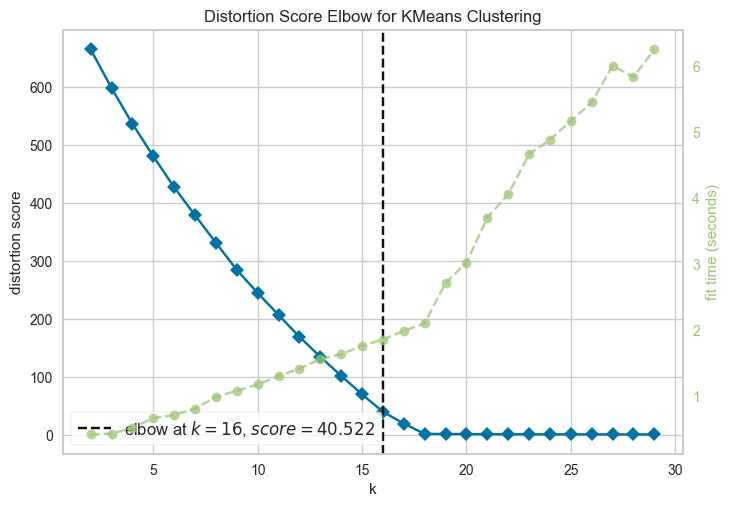

KElbowVisualizer(ax=<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(max_iter=10000, n_clusters=29, n_init=100,
                                  random_state=0, tol=0),
                 k=(2, 30))

In [18]:
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.datasets.loaders import load_nfl
from sklearn.cluster import KMeans


kmeans = KMeans( # elbow at k=16
    n_init=100,
    max_iter=10000,
    tol=0,
    random_state=0
)

kelbow_visualizer(kmeans, weighted_joined_reference_data, k=(2, 30))


### Read the defined yearly drift locations

In [31]:
import csv
# onehot_def_dict = np.load('../Datasets_concept_drift/real_world_data_drifts/airlines/airlines_onehot_def_dict.npy',
#                           allow_pickle=True).item()
# print(onehot_def_dict)
# true_drift_bool_onehot = onehot_def_dict['defined_drifts'][:-1]
with open('../Datasets_concept_drift/real_world_data_drifts/airlines/airlines_onehot_time.csv') as f:
    rdr = csv.reader(f, delimiter=',')
    true_drift_bool_onehot = rdr.__next__()
    print(true_drift_bool_onehot)
    true_drift_bool_onehot = [v.strip() == 'True' for v in true_drift_bool_onehot][:-1]

print(true_drift_bool_onehot)

['False', ' True', ' True', ' True', ' True', ' True', ' True', ' True', ' True', ' True', ' True', ' True', ' True', ' True', ' True', ' True', ' True', ' True', ' True', ' True', ' True', ' True']
[False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


### Use them for the evaluation

In [32]:
from eval_helpers import mssw_eval_real_world

_, fpr_mean, _, det_acc_mean, _ = mssw_eval_real_world.all_drifting_batches_randomness_robust(
    reference_data_batches=X_ref_batches_onehot,
    testing_data_batches=X_test_batches_onehot,
    true_drift_bool=true_drift_bool_onehot,
    n_clusters=16, n_init=100, max_iter=1000, tol=0,
    coeff=2.66, first_random_state=0,
    min_runs=2, std_err_threshold=0.05
)

print('onehot mean FPR:', fpr_mean)
print('onehot mean detection accuracy:', det_acc_mean)


min_runs 2
mean_av_s 0.020938210361140484
mean_mr 0.0005293032830021471
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
mean_av_s 0.02093821036114049
mean_mr 0.0005293032830021466
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
onehot mean FPR: 0.0
onehot mean detection accuracy: 0.0


## Experiments with target encoding (time-based)

### Find suitable KMeans clustering parameters for different numbers of clusters

In [34]:
from core import mssw_preprocessing
from eval_helpers import kmeans_verbose_helpers

weighted_joined_reference_data, _, _ = mssw_preprocessing.mssw_preprocess(X_ref_batches_target, X_test_batches_target)

filename = 'airlines_target.txt'
print(kmeans_verbose_helpers)
kmeans_verbose_helpers.write_verbose_kmeans_to_file(filename, weighted_joined_reference_data,
                                                    n_clusters=10, n_init=100, max_iter=500, tol=0, random_state=1053)
output_dicts = kmeans_verbose_helpers.convert_kmeans_output_file_to_dicts(filename, n_init=100)
kmeans_verbose_helpers.print_stats_from_kmeans_output_dicts(output_dicts)

<module 'eval_helpers.kmeans_verbose_helpers' from 'C:\\Users\\jpohl\\PycharmProjects\\clustering-drift-detection\\mssw\\eval_helpers\\kmeans_verbose_helpers.py'>
random state: 1053
total number of results: 100
maximum number of iterations: 25
minimum initial inertia: 604.4639612461592
maximum initial inertia: 1679.6857514253306
number of unique final inertia values: 9
minimum final inertia: 559.5817295184431
maximum final inertia: 763.6998517390384
total number of convergences: 100
number of strict convergences: 100
number of tol-based convergences: 0


### Try different numbers of clusters

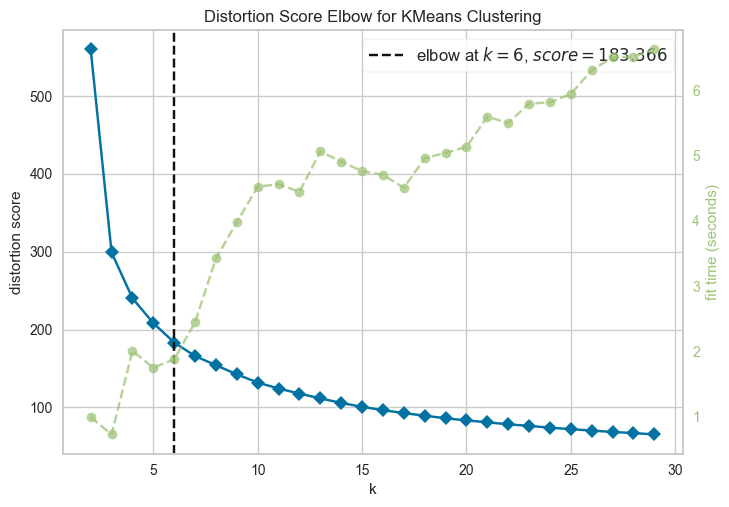

KElbowVisualizer(ax=<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(max_iter=10000, n_clusters=29, n_init=100,
                                  random_state=0, tol=0),
                 k=(2, 30))

In [35]:
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.datasets.loaders import load_nfl
from sklearn.cluster import KMeans


kmeans = KMeans( # elbow at k=6
    n_init=100,
    max_iter=10000,
    tol=0,
    random_state=0
)

kelbow_visualizer(kmeans, weighted_joined_reference_data, k=(2, 30))


### Read the defined yearly drift locations

In [39]:
import csv
# onehot_def_dict = np.load('../Datasets_concept_drift/real_world_data_drifts/airlines/airlines_onehot_def_dict.npy',
#                           allow_pickle=True).item()
# print(onehot_def_dict)
# true_drift_bool_onehot = onehot_def_dict['defined_drifts'][:-1]
with open('../Datasets_concept_drift/real_world_data_drifts/airlines/airlines_target_time.csv') as f:
    rdr = csv.reader(f, delimiter=',')
    true_drift_bool_target = rdr.__next__()
    print(true_drift_bool_target)
    true_drift_bool_target = [v.strip() == 'True' for v in true_drift_bool_target][:-1]

print(true_drift_bool_target)

['False', ' True', ' True', ' True', ' True', ' True', ' True', ' True', ' True', ' True', ' True', ' True', ' True', ' True', ' True', ' True', ' True', ' True', ' True', ' True', ' True', ' True']
[False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


### Use them for the evaluation

In [40]:
from eval_helpers import mssw_eval_real_world

_, fpr_mean, _, det_acc_mean, _ = mssw_eval_real_world.all_drifting_batches_randomness_robust(
    reference_data_batches=X_ref_batches_target,
    testing_data_batches=X_test_batches_target,
    true_drift_bool=true_drift_bool_target,
    n_clusters=6, n_init=100, max_iter=1000, tol=0,
    coeff=2.66, first_random_state=0,
    min_runs=2, std_err_threshold=0.05
)

print('onehot mean FPR:', fpr_mean)
print('onehot mean detection accuracy:', det_acc_mean)



min_runs 2
mean_av_s 0.09863256404961007
mean_mr 0.0015061579976276937
[True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False]
[False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
mean_av_s 0.09863256404961007
mean_mr 0.0015061579976276998
[True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False]
[False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
onehot mean FPR: 1.0
onehot mean detection accuracy: 0.05
